# CoolProp Introduction
This is a dedicated file to look at functionality of CoolProp - specifically in determining the properties of Nitrous as a coolant.

Some useful resources to reference are:
- [List of CoolProp Parameters](https://coolprop.org/coolprop/HighLevelAPI.html#parameter-table)

In [35]:
from CoolProp.CoolProp import PropsSI

import matplotlib.pyplot as plt
import numpy as np

In [36]:
coolant_name = "NITROUSOXIDE"
T = 300 # K
p = 2.758e+6 # Pa

### Define Transport Property Functions for Coolant
One option to define coolant properties as functions of T and P through CoolProp (<em>that only has values for density and specific heat at constant pressure</em>) is to use as one of the parameters the [Molar Vapor Quality](https://en.wikipedia.org/wiki/Vapor_quality) $Q$ of the coolant. (<em>We want to assume our coolant remains a liquid throughout the coolant channels</em>).

In [37]:
def rho_Q0_P(P):
    return PropsSI('DMASS','P', P, 'Q', 0, coolant_name)

def cp_Q0_P(P):
    return PropsSI('CPMASS','P', P, 'Q', 0, coolant_name)

def rho_Q0_T(T):
    return PropsSI('DMASS','T', T, 'Q', 0, coolant_name)

def cp_Q0_T(T):
    return PropsSI('CPMASS','T', T, 'Q', 0, coolant_name)

# define density and cp as a function of pressure and temperature
def rho(P, T):
    return PropsSI('DMASS','P', P, 'T', T, coolant_name)

def cp(P, T):
    return PropsSI('CPMASS','P', P, 'T', T, coolant_name)



Plotting $\rho$ and $C_p$ as a function of pressure for $Q = 0$ (<em>pure liquid</em>).

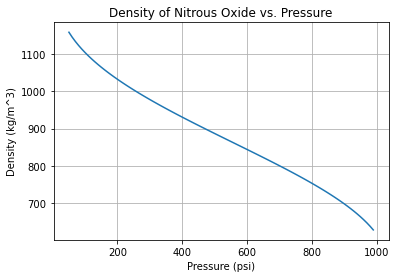

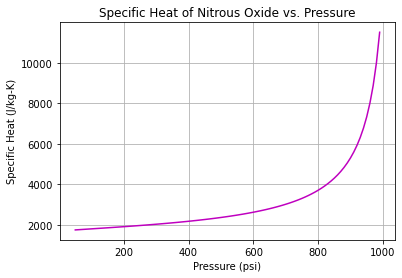

In [38]:
# plot the density and cp as a function of pressure over a range of pressure from 50 psi to 1000 psi
# pressure in psi
p_min = 50*6894.76 # Pa
p_max = 1000*6894.76 # Pa
p_step = 10*6894.76 # Pa

p_range = np.arange(p_min, p_max, p_step)
rho_range = np.zeros(len(p_range))
cp_range = np.zeros(len(p_range))

for i in range(len(p_range)):
    rho_range[i] = rho_Q0_P(p_range[i])
    cp_range[i] = cp_coolant(p_range[i])

fig = plt.figure(1)
fig.set_facecolor('white')
plt.plot(p_range/6894.76, rho_range)
plt.xlabel('Pressure (psi)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density of Nitrous Oxide vs. Pressure')
plt.grid(True)
plt.show()

fig = plt.figure(2)
fig.set_facecolor('white')
plt.plot(p_range/6894.76, cp_range, color = 'm')
plt.xlabel('Pressure (psi)')
plt.ylabel('Specific Heat (J/kg-K)')
plt.title('Specific Heat of Nitrous Oxide vs. Pressure')
plt.grid(True)
plt.show()

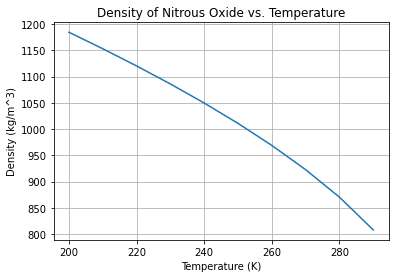

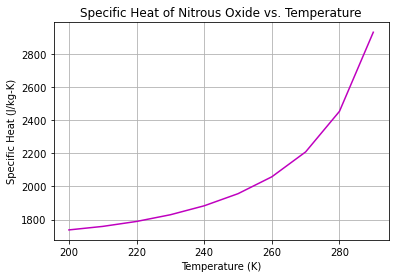

In [41]:
# plot the density and cp as a function of temperature over a range of temperature from 200 K to 300 K
# temperature in K
T_min = 200 # K
T_max = 300 # K
T_step = 10 # K

T_range = np.arange(T_min, T_max, T_step)
rho_range = np.zeros(len(T_range))
cp_range = np.zeros(len(T_range))

for i in range(len(T_range)):
    rho_range[i] = rho_Q0_T(T_range[i])
    cp_range[i] = cp_Q0_T(T_range[i])

fig = plt.figure(3)
fig.set_facecolor('white')
plt.plot(T_range, rho_range)
plt.xlabel('Temperature (K)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density of Nitrous Oxide vs. Temperature')
plt.grid(True)
plt.show()

fig = plt.figure(4)
fig.set_facecolor('white')
plt.plot(T_range, cp_range, color = 'm')
plt.xlabel('Temperature (K)')
plt.ylabel('Specific Heat (J/kg-K)')
plt.title('Specific Heat of Nitrous Oxide vs. Temperature')
plt.grid(True)
plt.show()



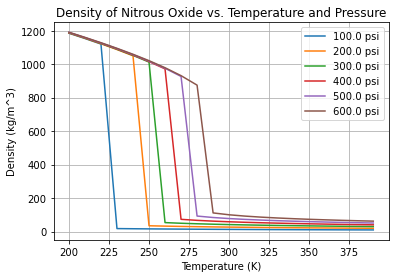

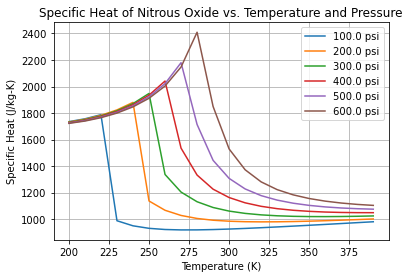

In [ ]:
# plot density and cp as a function of temperature over a range of temperature from 200 K to 400 K at pressures of 100 psi, 200 psi, 300 psi, 400 psi, 500 psi, 600 psi
# pressure in psi
T_min = 200 # K
T_max = 400 # K
T_step = 10 # K

T_range = np.arange(T_min, T_max, T_step)
rho_range = np.zeros(len(T_range))
cp_range = np.zeros(len(T_range))

p_range = np.array([100, 200, 300, 400, 500, 600])*6894.76 # Pa


fig = plt.figure(5)
fig.set_facecolor('white')
for j in range(len(p_range)):
    for i in range(len(T_range)):
        rho_range[i] = rho(p_range[j], T_range[i])
        cp_range[i] = cp(p_range[j], T_range[i])
    plt.plot(T_range, rho_range, label = str(p_range[j]/6894.76) + ' psi',  color = 'C{}'.format(j))
plt.xlabel('Temperature (K)')
plt.ylabel('Density (kg/m^3)')
plt.title('Density of Nitrous Oxide vs. Temperature and Pressure')
plt.legend()
plt.grid(True)
plt.show()

fig = plt.figure(6)
fig.set_facecolor('white')
for j in range(len(p_range)):
    for i in range(len(T_range)):
        rho_range[i] = rho(p_range[j], T_range[i])
        cp_range[i] = cp(p_range[j], T_range[i])
    plt.plot(T_range, cp_range, label = str(p_range[j]/6894.76) + ' psi', color = 'C{}'.format(j))
plt.xlabel('Temperature (K)')
plt.ylabel('Specific Heat (J/kg-K)')
plt.title('Specific Heat of Nitrous Oxide vs. Temperature and Pressure')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

'''
# Set up the coolant transport properties - let's say this engine is water cooled
def Pr_coolant(T, p):
    return PropsSI("PRANDTL", "T", T, "P", p, "WATER")

def mu_coolant(T, p):
    return PropsSI("VISCOSITY", "T", T, "P", p, "WATER")

def k_coolant(T, p):
    return PropsSI("CONDUCTIVITY", "T", T, "P", p, "WATER")

def cp_coolant(T, p):
    return PropsSI("CPMASS", "T", T, "P", p, "WATER")

def rho_coolant(T, p):
    return PropsSI("DMASS", "T", T, "P", p, "WATER") 
'''

'\n# Set up the coolant transport properties - let\'s say this engine is water cooled\ndef Pr_coolant(T, p):\n    return PropsSI("PRANDTL", "T", T, "P", p, "WATER")\n\ndef mu_coolant(T, p):\n    return PropsSI("VISCOSITY", "T", T, "P", p, "WATER")\n\ndef k_coolant(T, p):\n    return PropsSI("CONDUCTIVITY", "T", T, "P", p, "WATER")\n\ndef cp_coolant(T, p):\n    return PropsSI("CPMASS", "T", T, "P", p, "WATER")\n\ndef rho_coolant(T, p):\n    return PropsSI("DMASS", "T", T, "P", p, "WATER") \n'

### Comparison of Cantera vs CoolProp

In [ ]:
import cantera as ct
# Set up the coolant transport properties using Cantera
coolant = ct.Solution('gri30.yaml')
coolant.TPY = 298.15, p, "N2O:1" # defining starting conditions for coolant to be at chamber pressure and standard ambient temperature

def rho_coolant_can(Ti, p):
    coolant.TP = Ti, p
    return coolant.density_mass

def rho_coolant_cool(Ti, p):
    return PropsSI("D", "Q", 0, "P", p, coolant_name)

def cp_coolant_can(Ti, p):
    return PropsSI("CPMASS", "T", Ti, "P", p, coolant_name)

def cp_coolant_cool(Ti, p):
    coolant.TP = Ti, p
    return coolant.cp * coolant.viscosity / coolant.thermal_conductivity


rho_can = list()
rho_cool = list()

cp_can = list()
cp_cool = list()

T_list = range(300)[200:]
for i in T_list:
    rho_can.append(rho_coolant_can(i, p))
    rho_cool.append(rho_coolant_cool(i, p))
    cp_can.append(cp_coolant_can(i, p))
    cp_cool.append(cp_coolant_cool(i, p))

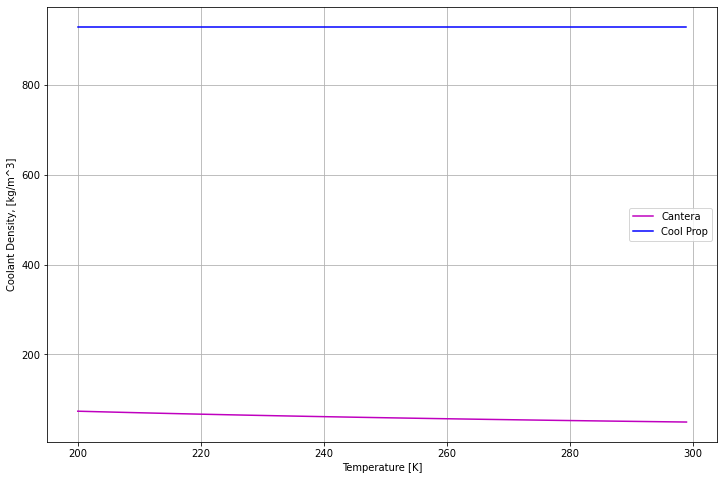

In [ ]:
import os
import matplotlib.pyplot as plt
folder = "canteraplots/"
if not os.path.exists(folder):
        os.mkdir(folder)

# Plot results
fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, rho_can, color="m", label="Cantera")
plt.plot(T_list, rho_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("Coolant Density, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)

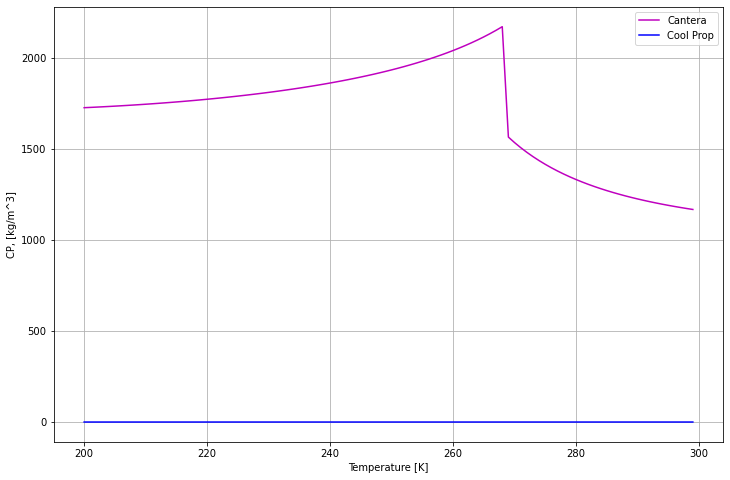

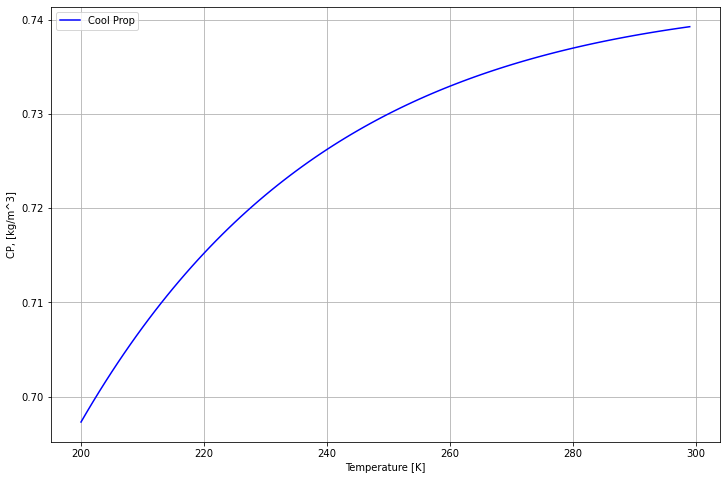

In [ ]:
# Plot results
fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, cp_can, color="m", label="Cantera")
plt.plot(T_list, cp_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("CP, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)

fig, ax = plt.subplots(figsize=(12,8))
plt.grid()
plt.plot(T_list, cp_cool, color="b", label="Cool Prop")
plt.legend()
ax.set_ylabel("CP, [kg/m^3]")
ax.set_xlabel("Temperature [K]")
plt.savefig(folder + "canteravscoolprop.png", dpi=300)